<a href="https://colab.research.google.com/github/Abdelmounim1996/Distributed-Learning-of-Finite-Gaussian-Mixtures/blob/main/Problem_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Abdelmounim1996/Distributed-Learning-of-Finite-Gaussian-Mixtures


Cloning into 'Distributed-Learning-of-Finite-Gaussian-Mixtures'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 116 (delta 44), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (116/116), 2.18 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py'

/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py


In [4]:
!cat '/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py'

import numpy as np
from scipy.stats import multivariate_normal
import time
from scipy import linalg
"""machaine learning  library"""
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
from pyspark.mllib.linalg import  DenseVector , DenseMatrix , _convert_to_vector
from pyspark.mllib.common import callMLlibFunc
import array as pyarray
# library mathematic & statistic 
import numpy as np
import time 
from scipy.stats import multivariate_normal
from scipy import linalg
from numpy.linalg import multi_dot
#from sklearn.mixture.base import BaseMixture, _check_shape
from sklearn.utils import check_array, check_random_state
# library for machine learning
from sklearn.cluster import KMeans
np.seterr(divide='ignore', invalid='ignore')
spark = SparkSession.builder.master("local[*]") \
                    .appName('Distributed Learning of Finite Gaussian Mixtu

In [5]:
import sys
import numpy as np
sys.path.append('/content/Distributed-Learning-of-Finite-Gaussian-Mixtures')

In [6]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 32 kB/s 
     |████████████████████████████████| 198 kB 52.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=783f65a968efcb2237c8cb9bdd85f9463560bc925d73361194bb1afecffe2d3e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [7]:
from mylib.GMR_GMMs import Gaussian_mixture_reduction_GMMs

In [9]:
import matplotlib.pyplot as plt


In [10]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


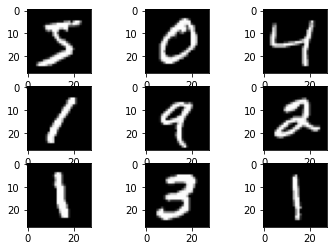

In [11]:
from matplotlib import pyplot
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [12]:
shape =  train_X[0: 1000].shape 
shape

(1000, 28, 28)

In [13]:
data = train_X[0: 1000]/255. + np.random.normal(loc=0 , scale=0.5 , size=shape )


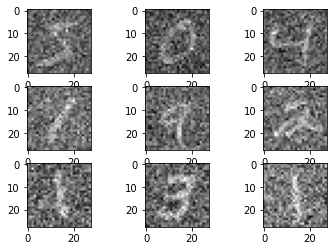

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
from matplotlib import pyplot
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(data[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


import numpy as np
from scipy.stats import multivariate_normal
import time
from sklearn.mixture import GaussianMixture 
dim = data.shape[1]**2
dim
model = GaussianMixture(n_components = 10 , random_state=0).fit( data.reshape(-1 , dim)  )
print(
      np.multiply.reduce(np.linalg.cholesky(model.covariances_).reshape(10 ,-1)[:, ::dim+1] , axis = 1 )
      )